In [ ]:
#머신러닝 - 갖고 있는 데이터로 컴퓨터를 공부시켜서 -> 새 데이터 줬을 때 결과 예측하게
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
adult = pd.read_csv("/content/gdrive/My Drive/adult.csv")

In [ ]:
adult

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
#타깃변수:(알고 싶은 변수) 전처리하기
# income값의 종류별 개수 파악해보자
df = adult.copy()

In [ ]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [ ]:
df['income'].value_counts(normalize=True)
#normalize=True를 하면 비율이 나온다

<=50K    0.760718
>50K     0.239282
Name: income, dtype: float64

In [ ]:
#  #   Column          Non-Null Count  Dtype
# ---  ------          --------------  -----
#  0   age             48842 non-null  int64 나이
#  1   workclass       48842 non-null  object 직종
#  2   fnlwgt          48842 non-null  int64  전체인구가중치
#  3   education       48842 non-null  object 교육수준
#  4   education_num   48842 non-null  int64  교육기간
#  5   marital_status  48842 non-null  object 혼인상태
#  6   occupation      48842 non-null  object 직업
#  7   relationship    48842 non-null  object 가족관계
#  8   race            48842 non-null  object 인종
#  9   sex             48842 non-null  object 성별
#  10  capital_gain    48842 non-null  int64  자산
#  11  capital_loss    48842 non-null  int64  부채
#  12  hours_per_week  48842 non-null  int64  주당근무시간
#  13  native_country  48842 non-null  object 출신국가
#  14  income          48842 non-null  object 소득

In [ ]:
# 분석에 필요 없는 속성 제거
df = df.drop(columns='fnlwgt')

In [ ]:
df

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df['sex']

0          Male
1          Male
2          Male
3          Male
4        Female
          ...  
48837    Female
48838      Male
48839    Female
48840      Male
48841    Female
Name: sex, Length: 48842, dtype: object

In [ ]:
# 머신러닝 할 때는 문자열보다는 컴퓨터가 좋아하는 0 1 로 하면 좋다
'''
  기계학습을 시킬 때, 문자열 데이터를 그대로 공부시키지 않고 그 데이터의 값의 종류만큼 컬럼을 만들고 해당 컬럼에 불 켜줌
  s_Male  s_Female
  1       0
  0       1
  0       1
  이런시그로.
  ==> one hot encoding이라고 함
  : 판다스의 pd.get_dummies() 가 알아서 해줌
'''

'\n  기계학습을 시킬 때, 문자열 데이터를 그대로 공부시키지 않고 그 데이터의 값의 종류만큼 컬럼을 만들고 해당 컬럼에 불 켜줌\n  s_Male  s_Female\n  1       0\n  0       1\n  0       1\n  이런시그로.\n  ==> one hot encoding이라고 함\n  : 판다스의 pd.get_dummies() 가 알아서 해줌\n'

In [ ]:
df_tmp = df['sex']
df_tmp

0          Male
1          Male
2          Male
3          Male
4        Female
          ...  
48837    Female
48838      Male
48839    Female
48840      Male
48841    Female
Name: sex, Length: 48842, dtype: object

In [ ]:
df_tmp.info()

<class 'pandas.core.series.Series'>
RangeIndex: 48842 entries, 0 to 48841
Series name: sex
Non-Null Count  Dtype 
--------------  ----- 
48842 non-null  object
dtypes: object(1)
memory usage: 381.7+ KB


In [ ]:
#값의 종류별 개수 확인
df_tmp.value_counts()

Male      32650
Female    16192
Name: sex, dtype: int64

In [ ]:
df_tmp = pd.get_dummies(df_tmp)
#문자열 값의 수만큼 컬럼을 만드는 원핫인코딩해줌

In [ ]:
df_tmp

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
48837,1,0
48838,0,1
48839,1,0
48840,0,1


In [ ]:
# 머신러닝 시킬라고 모든 컬럼을 다 원핫인코딩을 하면 컬럼이엄청많아지겟군

In [ ]:
# 데이터프레임으로부터 타깃변수(우리가 찾으려는 답 income)을 삭제하고 모든 문자열변수(컬럼)에 대해 원핫인코딩하자
# 값이 문자열type인애들만임!!!

In [ ]:
# df로부터 답을 분리시키자
target = df['income']
target

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 48842, dtype: object

In [ ]:
df = df.drop(columns='income')
df = pd.get_dummies(df)

In [ ]:
df.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,25,7,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,7688,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,18,10,0,0,30,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df.info(max_cols=np.inf) # 컬럼 107개 넘 많은데 그거 다 보여주게

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 107 columns):
 #    Column                                     Non-Null Count  Dtype
---   ------                                     --------------  -----
 0    age                                        48842 non-null  int64
 1    education_num                              48842 non-null  int64
 2    capital_gain                               48842 non-null  int64
 3    capital_loss                               48842 non-null  int64
 4    hours_per_week                             48842 non-null  int64
 5    workclass_?                                48842 non-null  uint8
 6    workclass_Federal-gov                      48842 non-null  uint8
 7    workclass_Local-gov                        48842 non-null  uint8
 8    workclass_Never-worked                     48842 non-null  uint8
 9    workclass_Private                          48842 non-null  uint8
 10   workclass_Self-emp-inc          

In [ ]:
# 컴퓨터에게 공부 시킬 준비가 됐다.
# 문제지: df, 답: target

In [ ]:
df.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,25,7,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,7688,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,18,10,0,0,30,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
target.head()

0    <=50K
1    <=50K
2     >50K
3     >50K
4    <=50K
Name: income, dtype: object

In [ ]:
# 기계학습을 시키기 전에 데이터를 훈련용(학습용)데이터와 테스트(검증용)데이터로 분리하는 작업을 한다
# 일반적으로 전체 데이터의 70-80퍼센트를 훈련용에 사용하고 나머지를 검증용으로 쓴다
# 그렇게 나누는 건 랜덤으로 헤야되고 그걸 해주는 객체와함수가 있삼.
from sklearn.model_selection import train_test_split


In [ ]:
# 아까 원핫인코딩하려고 따로 분리해뒀던 답(라벨,타깃변수)를 df에다가 붙이자
df['income'] = target

In [ ]:
# 라벨(답)의 값의 종류별 빈도 확인해보자
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [ ]:
# 라벨의 밸류값이 <=50k 이런식으로 돼있어서 가독성 떨어지니까 high, low로 변경하자
df['income'] = np.where(df['income']=='<=50K','low','high')

In [ ]:
df['income']

0         low
1         low
2        high
3        high
4         low
         ... 
48837     low
48838    high
48839     low
48840     low
48841    high
Name: income, Length: 48842, dtype: object

In [ ]:
# 훈련데이터와 검증데이터를 분리시키자
# 함수 실행한 결과가 두 개를 리턴하니까
df_train, df_test = train_test_split(df #사용할 데이터
                                     ,test_size=0.3 #테스트 데이터의 크기. 보통 30퍼, 70퍼 이렇게 나눈다햇으니까 0.3
                                     ,stratify = df['income'] #뭘 기준으로 골고루 분포되게 나눠줄까?> 대체로 답을 기준으로 골고루 섞게한다
                                     ,random_state=1234 #항상 동일한 랜덤값을 만들어줌.매번 돌릴 때마다 다르게 나눠지면 안되니까
                                     )

In [ ]:
df.shape

(48842, 108)

In [ ]:
df_train.shape
#(34189, 108) => 70퍼센트가 들어갓다

(34189, 108)

In [ ]:
df_test.shape
#(14653, 108) => 30퍼센트가 들어갓다

(14653, 108)

In [ ]:
#값이 골고루 섞여있는지 보자
df_test['income'].value_counts()

low     11147
high     3506
Name: income, dtype: int64

In [ ]:
df_train['income'].value_counts()

low     26008
high     8181
Name: income, dtype: int64

In [ ]:
# 준비된 데이터를 갖고 공부를 시켜보자
# 공부(학습)를 시키기 위한 다양한 파이썬 패키지들이 있다. 패키지 안에서도 또 공부시키는 방법(학습모델)이 다양함

In [ ]:
#의사결정나무(Decision Tree)모델을 이용해서 공부시켜보자 - 의사결정모델은 스무고개 같은 느낌
# 데이터마다 어떤 방식으로 공부시켜야 제일 잘 되는지는 다르다 . 그래서 다양한 모델을 적용해가면서 제일 효과가 좋은 걸 택해야 하는 게 데싸의 역할

In [ ]:
from sklearn import tree

In [ ]:
# 의사결정나무 모델로 공부하기 위한 도구를 만들었다.
clf = tree.DecisionTreeClassifier(random_state=1234
                                ,max_depth=3 #나무의 깊이. 얘를 바꿔가면서 하게된다.
                                )

In [ ]:
# 훈련데이터로부터 문제와 답을 분리
#보통 문제를 x, 답을 y라고 둠
train_x = df_train.drop(columns='income')
train_y = df_train['income']

In [ ]:
# 공부시키기 위한 도구(학습모델)로부터 학습을 시키자
# 대부분의 학습 모델의 공부를 시키기 위한 함수는 fit이라고 만들어져잇삼.
clf.fit(X=train_x, y=train_y) #헉스 X는 대문자네..
# fit을 하면(학습을 거지게 되면) 어떤 수식이 만들어진대. 새로운 데이터가 들어가면 그 수식에 의해 아웃풋을 내줌
# 새롷운 데이터로 학습모델이 예측하게 해서 성능이 좋으면 그 모델을 현장에서 사용하고, 아니면 다른 모델을 찾는다(변수값을 바꾼다든지딴모델찾든지등등)

DecisionTreeClassifier(max_depth=3, random_state=1234)

In [ ]:
# 학습한 모델에 새로운 데이터(검증용)로 예측을 시켜보자
# 그러려면 검증용 데이터도 문제랑 답 분리해야댐
test_x = df_test.drop(columns='income')
test_y = df_test['income']

In [ ]:
# 공부시키는 함수 fit, 예측시키는 함수 predict
# predict함수는 각 문제에 따른 답을 반환한다.
test_pred = clf.predict(test_x) #그러면 자기가 공부한 걸 기반으로 답을 뱉어냄

In [ ]:
test_pred[:5] #np.array를 반환하니까 앞에 5개 확인하기

array(['low', 'low', 'low', 'low', 'low'], dtype=object)

In [ ]:
test_y.head() #얘랑 비교

11712    low
24768    low
26758    low
14295    low
3683     low
Name: income, dtype: object

In [ ]:
# 성능 평가: 얼마나 공부를 잘 했는지 성능을 평가하기 위해 혼동배열(confusion matrix)를 만들어 보자
# 함수를 써서
from sklearn.metrics import confusion_matrix

In [ ]:
conf_mat = confusion_matrix(
    y_true = test_y #
    ,y_pred = test_pred
    ,labels = ['high','low']
)

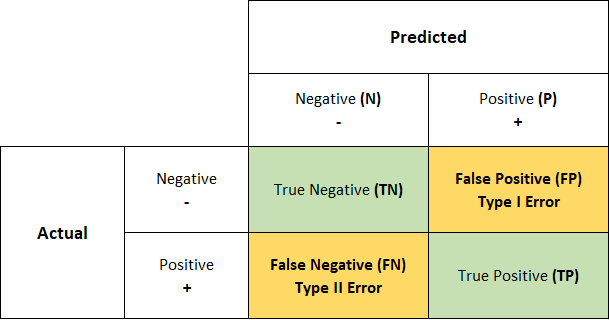

In [ ]:
conf_mat
#             예측
#              low    high
# 실제 low ([[ 1801,  1705],
#      high [  582, 10565]])

array([[ 1801,  1705],
       [  582, 10565]])

In [ ]:
#  재현율(recall),민감도, TPR(True Positive Rate):
# 실제가 긍정인 대상 중 예측값이 실제로 일치한 데이터의 비율(맞는 걸 맞다고 하는 비율)
# TP / (FN+TP)

In [ ]:
import sklearn.metrics as metrics

In [ ]:
# RECALL 재현율을 알아보자
# w진짜로 5만달러 이상인 사람 중에 5만달러 이상이라고 맞힌 비율
metrics.recall_score(y_true = test_y, y_pred = test_pred , pos_label='high')

0.5136908157444381

In [ ]:
# 정확도(Accuracy)
# 전체 데이터 수 중에서 예측 결과와 실제값이 동일한 건수가 차지하는 비율(맞힌 비율)
# (TP+TN) / (TN+FN+TP+FP)

In [ ]:
# 정확도를 알려주는 함수 accuracy
metrics.accuracy_score(y_true=test_y, y_pred= test_pred) #매개변수는 실제값, 예측값

0.8439227461953184

In [ ]:
# 정밀도(Precision)
# 내가 긍정이라고 대답한 것 중에 실제 긍정인 비율
# TP / (TP+FP)
metrics.precision_score(y_true=test_y, y_pred= test_pred, pos_label='high')

0.7557700377675199

In [ ]:
# 중요하게 사용될 때
# 정확도: 긍정, 부정 데이터의 수가 비슷할 때
# 정밀도: 스팸메일 필터링
# 재현율: 암 진단
# f1-score = 정밀도와 재현율의 조화평균
metrics.f1_score(y_true= test_y, y_pred = test_pred, pos_label='high')

0.6116488368143997